**Table of Contents** <br>
* [1. Imports](#imports)
* [2. Self Organizing Maps](#2)



<hr>
<a class="anchor" id="Imports">
    
# 1. Imports
    
</a>

#### Initial Note:
https://github.com/joaopfonseca/Data-Mining-22-23

In [1]:
#!pip install kmodes
#!pip install graphviz
import graphviz
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer
sns.set()
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.metrics import calinski_harabasz_score
import seaborn as sb
from kmodes.kprototypes import KPrototypes
from matplotlib.lines import Line2D
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


from sklearn_extra.cluster import KMedoids
# ! pip install scikit-learn-extra
# ! pip install sklearn-extra

In [2]:
df = pd.read_csv('df.csv',index_col=[0])

In [3]:
df_outliers_ohc = pd.read_csv('df_outliers_ohc.csv',index_col=[0])

In [4]:
df.head()

,ClaimsRate,Age,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,SalarySpent,EducDeg_2.0,EducDeg_3.0,EducDeg_4.0,Children_1,Cancelled_1
CustID,,,,,,,,,,,,,
1.0,-0.559322,-0.482759,0.357075,-0.257555,0.012021,0.619809,-0.177071,-0.140650,1.0,0.0,0.0,1.0,0.0
2.0,0.677966,-0.965517,-0.865761,0.978485,-0.588569,3.104708,1.449848,-1.225286,1.0,0.0,0.0,1.0,0.0
3.0,-0.745763,-0.103448,-0.372926,0.415420,-0.326120,1.419295,1.756908,-0.224922,0.0,0.0,0.0,0.0,0.0
4.0,0.457627,-0.482759,-0.308089,-0.430432,1.962267,0.414575,0.212183,-0.759114,0.0,1.0,0.0,1.0,0.0
5.0,0.305085,-0.206897,0.289338,-0.416528,0.471710,-0.089648,0.545922,-0.341952,0.0,1.0,0.0,1.0,0.0


In [5]:
df_outliers_ohc.head()

,ClaimsRate,Age,MotorPercentageSpent,HouseholdPercentageSpent,HealthPercentageSpent,LifePercentageSpent,WorkPercentageSpent,SalarySpent,EducDeg_2.0,EducDeg_3.0,EducDeg_4.0,Children_1
CustID,,,,,,,,,,,,
52.0,6.234544,0.821705,2.026776,-0.438482,-0.261338,-0.089257,-0.800124,2.817521,0.0,1.0,0.0,1.0
113.0,3.759082,0.418605,1.903978,-0.490234,-0.024285,-0.095918,-0.186179,1.859967,0.0,0.0,1.0,1.0
136.0,3.542384,0.139535,0.773943,-0.060141,0.501841,0.588865,-0.599826,1.163966,0.0,1.0,0.0,1.0
150.0,-0.070108,-0.046512,0.007735,0.016679,-0.314962,-0.027620,10.410992,0.025863,0.0,0.0,0.0,1.0
172.0,65.084767,0.108527,1.203981,-0.260292,0.829942,-0.080349,-0.000334,0.287343,0.0,1.0,0.0,1.0


<hr>
<a class="anchor" id="2">
    
# 2. DBSCAN
    
</a>

In [6]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    'Cancelled_1',
    "ClaimsRate"
]

dfInsurance=df[insurance_features_ohc]

demographic_features_ohc=[
    'SalarySpent',
    'Children_1',
    'EducDeg_2.0',
    'EducDeg_3.0',
    'EducDeg_4.0',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

demographic_metric_features_ohc=[
    'SalarySpent',
    'Age'
]
dfDemographic_metric=df[demographic_metric_features_ohc]



Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2929, ncost: 38344.52450674712
Run: 1, iteration: 2/100, moves: 505, ncost: 38297.42423095938
Run: 1, iteration: 3/100, moves: 73, ncost: 38295.66568903512
Run: 1, iteration: 4/100, moves: 10, ncost: 38295.565942166315
Run: 1, iteration: 5/100, moves: 3, ncost: 38295.55371128061
Run: 1, iteration: 6/100, moves: 2, ncost: 38295.54295432316
Run: 1, iteration: 7/100, moves: 4, ncost: 38295.529169356116
Run: 1, iteration: 8/100, moves: 0, ncost: 38295.529169356116
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1913, ncost: 38452.95644418713
Run: 2, iteration: 2/100, moves: 552, ncost: 38302.54069310144
Run: 2, iteration: 3/100, moves: 99, ncost: 38297.119637806696
Run: 2, iteration: 4/100, moves: 40, ncost: 38296.01098562799
Run: 2, iterat

Run: 1, iteration: 23/100, moves: 11, ncost: 33821.45835664519
Run: 1, iteration: 24/100, moves: 3, ncost: 33821.44237869358
Run: 1, iteration: 25/100, moves: 0, ncost: 33821.44237869358
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3675, ncost: 34503.53367872215
Run: 2, iteration: 2/100, moves: 1541, ncost: 33933.745548083636
Run: 2, iteration: 3/100, moves: 370, ncost: 33866.761721194314
Run: 2, iteration: 4/100, moves: 213, ncost: 33835.837116849645
Run: 2, iteration: 5/100, moves: 125, ncost: 33827.23122885645
Run: 2, iteration: 6/100, moves: 67, ncost: 33825.09123650134
Run: 2, iteration: 7/100, moves: 43, ncost: 33823.666449186894
Run: 2, iteration: 8/100, moves: 33, ncost: 33822.27000379959
Run: 2, iteration: 9/100, moves: 21, ncost: 33821.91265582772
Run: 2, iteration: 10/100, moves: 12, ncost: 33821.78896416178
Run: 2, iteration: 11/100, moves: 0, ncost: 33821.78896416178
Init: initializing centroids
Init: init

Run: 8, iteration: 19/100, moves: 1, ncost: 33846.32961460497
Run: 8, iteration: 20/100, moves: 0, ncost: 33846.32961460497
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 2357, ncost: 34824.75395782066
Run: 9, iteration: 2/100, moves: 976, ncost: 34179.19866261748
Run: 9, iteration: 3/100, moves: 563, ncost: 33910.971204094516
Run: 9, iteration: 4/100, moves: 289, ncost: 33855.184637130085
Run: 9, iteration: 5/100, moves: 110, ncost: 33842.14964065239
Run: 9, iteration: 6/100, moves: 68, ncost: 33838.5635232885
Run: 9, iteration: 7/100, moves: 58, ncost: 33834.565057113694
Run: 9, iteration: 8/100, moves: 72, ncost: 33831.23773099082
Run: 9, iteration: 9/100, moves: 74, ncost: 33827.796026670076
Run: 9, iteration: 10/100, moves: 46, ncost: 33826.19754432891
Run: 9, iteration: 11/100, moves: 27, ncost: 33825.70053706152
Run: 9, iteration: 12/100, moves: 23, ncost: 33825.29608303281
Run: 9, iteration: 13/100, moves: 21, nc

Run: 6, iteration: 5/100, moves: 312, ncost: 29737.142604803408
Run: 6, iteration: 6/100, moves: 122, ncost: 29730.10608773147
Run: 6, iteration: 7/100, moves: 61, ncost: 29728.369753314644
Run: 6, iteration: 8/100, moves: 19, ncost: 29727.959237876996
Run: 6, iteration: 9/100, moves: 5, ncost: 29727.939712457395
Run: 6, iteration: 10/100, moves: 1, ncost: 29727.937910564953
Run: 6, iteration: 11/100, moves: 0, ncost: 29727.937910564953
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 3498, ncost: 32008.007190963177
Run: 7, iteration: 2/100, moves: 1192, ncost: 31502.111577367225
Run: 7, iteration: 3/100, moves: 675, ncost: 31114.959457903242
Run: 7, iteration: 4/100, moves: 635, ncost: 30581.139433658856
Run: 7, iteration: 5/100, moves: 595, ncost: 30197.388708603445
Run: 7, iteration: 6/100, moves: 425, ncost: 30081.103702093886
Run: 7, iteration: 7/100, moves: 235, ncost: 30052.975213392034
Run: 7, iteration: 8/100, mov

Run: 2, iteration: 16/100, moves: 9, ncost: 28003.690207737007
Run: 2, iteration: 17/100, moves: 2, ncost: 28003.682343377975
Run: 2, iteration: 18/100, moves: 0, ncost: 28003.682343377975
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 4282, ncost: 28444.709221565216
Run: 3, iteration: 2/100, moves: 1868, ncost: 27518.892660042875
Run: 3, iteration: 3/100, moves: 686, ncost: 27364.56389386134
Run: 3, iteration: 4/100, moves: 340, ncost: 27318.254357092173
Run: 3, iteration: 5/100, moves: 173, ncost: 27308.128050466883
Run: 3, iteration: 6/100, moves: 83, ncost: 27305.329014238843
Run: 3, iteration: 7/100, moves: 60, ncost: 27303.768260573954
Run: 3, iteration: 8/100, moves: 35, ncost: 27303.27814023956
Run: 3, iteration: 9/100, moves: 24, ncost: 27302.986725843468
Run: 3, iteration: 10/100, moves: 27, ncost: 27302.507207712384
Run: 3, iteration: 11/100, moves: 17, ncost: 27302.34744698912
Run: 3, iteration: 12/100, moves

Starting iterations...
Run: 10, iteration: 1/100, moves: 3935, ncost: 29661.536481870535
Run: 10, iteration: 2/100, moves: 2017, ncost: 28177.93246109336
Run: 10, iteration: 3/100, moves: 1381, ncost: 27558.86790794182
Run: 10, iteration: 4/100, moves: 719, ncost: 27370.321177397393
Run: 10, iteration: 5/100, moves: 409, ncost: 27320.599200757202
Run: 10, iteration: 6/100, moves: 223, ncost: 27304.078529913353
Run: 10, iteration: 7/100, moves: 114, ncost: 27299.23570205376
Run: 10, iteration: 8/100, moves: 53, ncost: 27298.121654208295
Run: 10, iteration: 9/100, moves: 19, ncost: 27297.93498995921
Run: 10, iteration: 10/100, moves: 12, ncost: 27297.871484688516
Run: 10, iteration: 11/100, moves: 5, ncost: 27297.84539947058
Run: 10, iteration: 12/100, moves: 0, ncost: 27297.84539947058
Best run was number 9
For n_clusters = 5, the average silhouette_score is : 0.1583719327489885
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init

Run: 7, iteration: 7/100, moves: 269, ncost: 25847.464700328903
Run: 7, iteration: 8/100, moves: 208, ncost: 25772.89730148656
Run: 7, iteration: 9/100, moves: 245, ncost: 25663.624377965803
Run: 7, iteration: 10/100, moves: 264, ncost: 25594.441874648663
Run: 7, iteration: 11/100, moves: 162, ncost: 25576.530775445703
Run: 7, iteration: 12/100, moves: 72, ncost: 25573.541966065022
Run: 7, iteration: 13/100, moves: 54, ncost: 25572.31270725203
Run: 7, iteration: 14/100, moves: 35, ncost: 25571.692194154868
Run: 7, iteration: 15/100, moves: 17, ncost: 25571.429348982503
Run: 7, iteration: 16/100, moves: 27, ncost: 25571.109354308603
Run: 7, iteration: 17/100, moves: 8, ncost: 25571.034930901937
Run: 7, iteration: 18/100, moves: 5, ncost: 25570.991718796187
Run: 7, iteration: 19/100, moves: 2, ncost: 25570.98319749023
Run: 7, iteration: 20/100, moves: 0, ncost: 25570.98319749023
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, move

Run: 3, iteration: 7/100, moves: 347, ncost: 24300.09319888066
Run: 3, iteration: 8/100, moves: 390, ncost: 24133.94923598244
Run: 3, iteration: 9/100, moves: 572, ncost: 24002.94997058204
Run: 3, iteration: 10/100, moves: 405, ncost: 23917.248990208373
Run: 3, iteration: 11/100, moves: 334, ncost: 23852.748248136624
Run: 3, iteration: 12/100, moves: 212, ncost: 23827.978140720097
Run: 3, iteration: 13/100, moves: 129, ncost: 23820.182694130635
Run: 3, iteration: 14/100, moves: 50, ncost: 23818.844415840296
Run: 3, iteration: 15/100, moves: 22, ncost: 23818.396109560945
Run: 3, iteration: 16/100, moves: 16, ncost: 23818.142207071436
Run: 3, iteration: 17/100, moves: 5, ncost: 23817.988257664565
Run: 3, iteration: 18/100, moves: 8, ncost: 23817.90405607415
Run: 3, iteration: 19/100, moves: 1, ncost: 23817.900060136897
Run: 3, iteration: 20/100, moves: 0, ncost: 23817.900060136897
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, mo

Run: 9, iteration: 3/100, moves: 1182, ncost: 25272.812081658165
Run: 9, iteration: 4/100, moves: 1103, ncost: 24839.47866728229
Run: 9, iteration: 5/100, moves: 944, ncost: 24519.664304388923
Run: 9, iteration: 6/100, moves: 527, ncost: 24364.32778235218
Run: 9, iteration: 7/100, moves: 175, ncost: 24350.68982716345
Run: 9, iteration: 8/100, moves: 74, ncost: 24347.40028133691
Run: 9, iteration: 9/100, moves: 40, ncost: 24346.294331066
Run: 9, iteration: 10/100, moves: 35, ncost: 24345.640265909362
Run: 9, iteration: 11/100, moves: 22, ncost: 24345.397006308325
Run: 9, iteration: 12/100, moves: 15, ncost: 24345.137892431092
Run: 9, iteration: 13/100, moves: 12, ncost: 24344.901932755532
Run: 9, iteration: 14/100, moves: 2, ncost: 24344.86780187251
Run: 9, iteration: 15/100, moves: 2, ncost: 24344.847346302668
Run: 9, iteration: 16/100, moves: 4, ncost: 24344.808552859653
Run: 9, iteration: 17/100, moves: 3, ncost: 24344.79019695226
Run: 9, iteration: 18/100, moves: 5, ncost: 24344.614

Run: 5, iteration: 11/100, moves: 283, ncost: 22590.026499833926
Run: 5, iteration: 12/100, moves: 133, ncost: 22586.143367071014
Run: 5, iteration: 13/100, moves: 31, ncost: 22585.779635715928
Run: 5, iteration: 14/100, moves: 8, ncost: 22585.739921655768
Run: 5, iteration: 15/100, moves: 9, ncost: 22585.711786433225
Run: 5, iteration: 16/100, moves: 1, ncost: 22585.708725488876
Run: 5, iteration: 17/100, moves: 0, ncost: 22585.708725488876
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 3636, ncost: 23728.819924155006
Run: 6, iteration: 2/100, moves: 1248, ncost: 23297.78379561366
Run: 6, iteration: 3/100, moves: 856, ncost: 23069.214793518586
Run: 6, iteration: 4/100, moves: 546, ncost: 22962.694630853035
Run: 6, iteration: 5/100, moves: 340, ncost: 22909.74974244192
Run: 6, iteration: 6/100, moves: 243, ncost: 22880.507872532577
Run: 6, iteration: 7/100, moves: 211, ncost: 22861.092668230733
Run: 6, iteration: 8/100, 

Run: 1, iteration: 15/100, moves: 21, ncost: 22016.914059757226
Run: 1, iteration: 16/100, moves: 18, ncost: 22016.700965433236
Run: 1, iteration: 17/100, moves: 15, ncost: 22016.568007060607
Run: 1, iteration: 18/100, moves: 7, ncost: 22016.534935794305
Run: 1, iteration: 19/100, moves: 4, ncost: 22016.514109882468
Run: 1, iteration: 20/100, moves: 3, ncost: 22016.501115768348
Run: 1, iteration: 21/100, moves: 5, ncost: 22016.448196876
Run: 1, iteration: 22/100, moves: 12, ncost: 22016.379570884983
Run: 1, iteration: 23/100, moves: 7, ncost: 22016.342503227326
Run: 1, iteration: 24/100, moves: 6, ncost: 22016.316465505293
Run: 1, iteration: 25/100, moves: 7, ncost: 22016.289074044962
Run: 1, iteration: 26/100, moves: 1, ncost: 22016.287017662482
Run: 1, iteration: 27/100, moves: 0, ncost: 22016.287017662482
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3425, ncost: 23196.016596473408
Run: 2, iteration: 2/100, moves: 12

Starting iterations...
Run: 6, iteration: 1/100, moves: 3752, ncost: 22908.84367953852
Run: 6, iteration: 2/100, moves: 1503, ncost: 22317.619318103236
Run: 6, iteration: 3/100, moves: 911, ncost: 22082.652705317763
Run: 6, iteration: 4/100, moves: 479, ncost: 22008.950244942425
Run: 6, iteration: 5/100, moves: 271, ncost: 21981.032201912036
Run: 6, iteration: 6/100, moves: 192, ncost: 21964.727322368137
Run: 6, iteration: 7/100, moves: 204, ncost: 21950.426907375495
Run: 6, iteration: 8/100, moves: 155, ncost: 21942.27221674339
Run: 6, iteration: 9/100, moves: 105, ncost: 21935.618871777013
Run: 6, iteration: 10/100, moves: 79, ncost: 21931.580542132153
Run: 6, iteration: 11/100, moves: 74, ncost: 21928.573806779616
Run: 6, iteration: 12/100, moves: 48, ncost: 21926.592764953137
Run: 6, iteration: 13/100, moves: 41, ncost: 21925.174729592505
Run: 6, iteration: 14/100, moves: 49, ncost: 21922.639951080106
Run: 6, iteration: 15/100, moves: 56, ncost: 21920.49457739961
Run: 6, iteration:

Run: 1, iteration: 8/100, moves: 129, ncost: 21026.326988656354
Run: 1, iteration: 9/100, moves: 73, ncost: 21021.968214182456
Run: 1, iteration: 10/100, moves: 52, ncost: 21018.27156441907
Run: 1, iteration: 11/100, moves: 47, ncost: 21015.24166822398
Run: 1, iteration: 12/100, moves: 39, ncost: 21011.096130513888
Run: 1, iteration: 13/100, moves: 54, ncost: 21005.466719034874
Run: 1, iteration: 14/100, moves: 44, ncost: 21002.51331005873
Run: 1, iteration: 15/100, moves: 45, ncost: 20999.77761758929
Run: 1, iteration: 16/100, moves: 46, ncost: 20997.11725747686
Run: 1, iteration: 17/100, moves: 34, ncost: 20995.362047280032
Run: 1, iteration: 18/100, moves: 24, ncost: 20994.195869293097
Run: 1, iteration: 19/100, moves: 20, ncost: 20992.866207093164
Run: 1, iteration: 20/100, moves: 28, ncost: 20991.963664732546
Run: 1, iteration: 21/100, moves: 12, ncost: 20991.45397483249
Run: 1, iteration: 22/100, moves: 33, ncost: 20980.862849503028
Run: 1, iteration: 23/100, moves: 65, ncost: 20

Run: 5, iteration: 15/100, moves: 17, ncost: 21127.08337960717
Run: 5, iteration: 16/100, moves: 6, ncost: 21127.007857475004
Run: 5, iteration: 17/100, moves: 7, ncost: 21126.869316272405
Run: 5, iteration: 18/100, moves: 8, ncost: 21126.778090905224
Run: 5, iteration: 19/100, moves: 13, ncost: 21126.69993652466
Run: 5, iteration: 20/100, moves: 4, ncost: 21126.68477820269
Run: 5, iteration: 21/100, moves: 3, ncost: 21126.662716231956
Run: 5, iteration: 22/100, moves: 9, ncost: 21126.576548058325
Run: 5, iteration: 23/100, moves: 5, ncost: 21126.55028182602
Run: 5, iteration: 24/100, moves: 0, ncost: 21126.55028182602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 4012, ncost: 22251.009285030985
Run: 6, iteration: 2/100, moves: 1588, ncost: 21582.52646148804
Run: 6, iteration: 3/100, moves: 927, ncost: 21371.414645427783
Run: 6, iteration: 4/100, moves: 437, ncost: 21320.099975657024
Run: 6, iteration: 5/100, moves: 232

Run: 10, iteration: 11/100, moves: 259, ncost: 21233.420139818525
Run: 10, iteration: 12/100, moves: 266, ncost: 21209.49846002701
Run: 10, iteration: 13/100, moves: 254, ncost: 21181.353723794273
Run: 10, iteration: 14/100, moves: 243, ncost: 21154.454214300626
Run: 10, iteration: 15/100, moves: 241, ncost: 21106.08632930019
Run: 10, iteration: 16/100, moves: 336, ncost: 21014.53075840649
Run: 10, iteration: 17/100, moves: 298, ncost: 20950.52337672539
Run: 10, iteration: 18/100, moves: 210, ncost: 20915.58805405951
Run: 10, iteration: 19/100, moves: 129, ncost: 20898.93006685416
Run: 10, iteration: 20/100, moves: 91, ncost: 20889.06020861677
Run: 10, iteration: 21/100, moves: 71, ncost: 20881.378370223378
Run: 10, iteration: 22/100, moves: 62, ncost: 20878.65624059615
Run: 10, iteration: 23/100, moves: 25, ncost: 20877.967259277826
Run: 10, iteration: 24/100, moves: 27, ncost: 20876.87460801399
Run: 10, iteration: 25/100, moves: 27, ncost: 20876.160380307916
Run: 10, iteration: 26/10

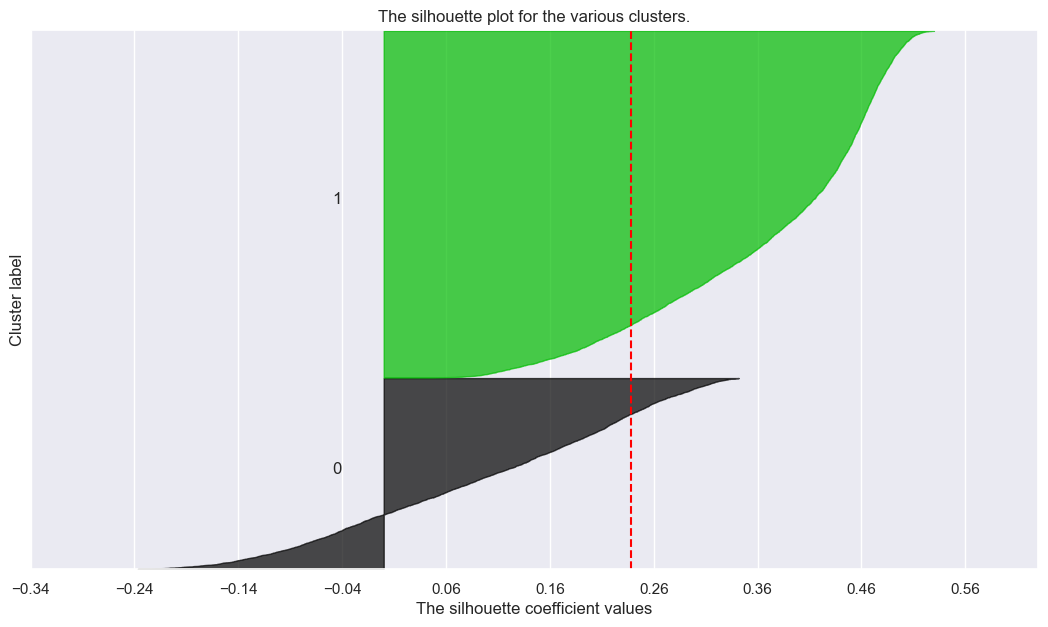

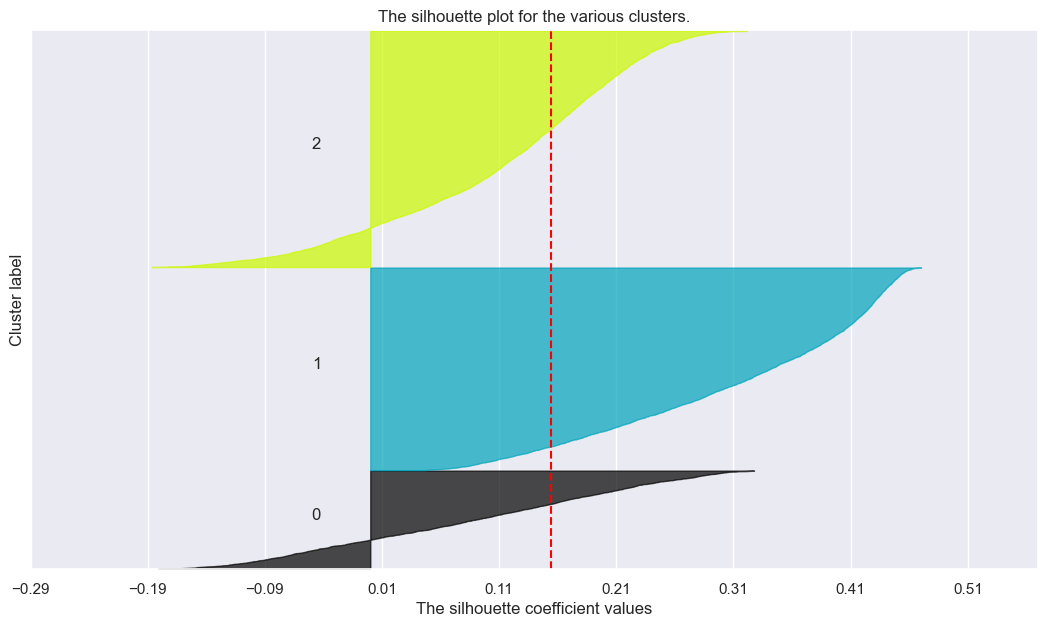

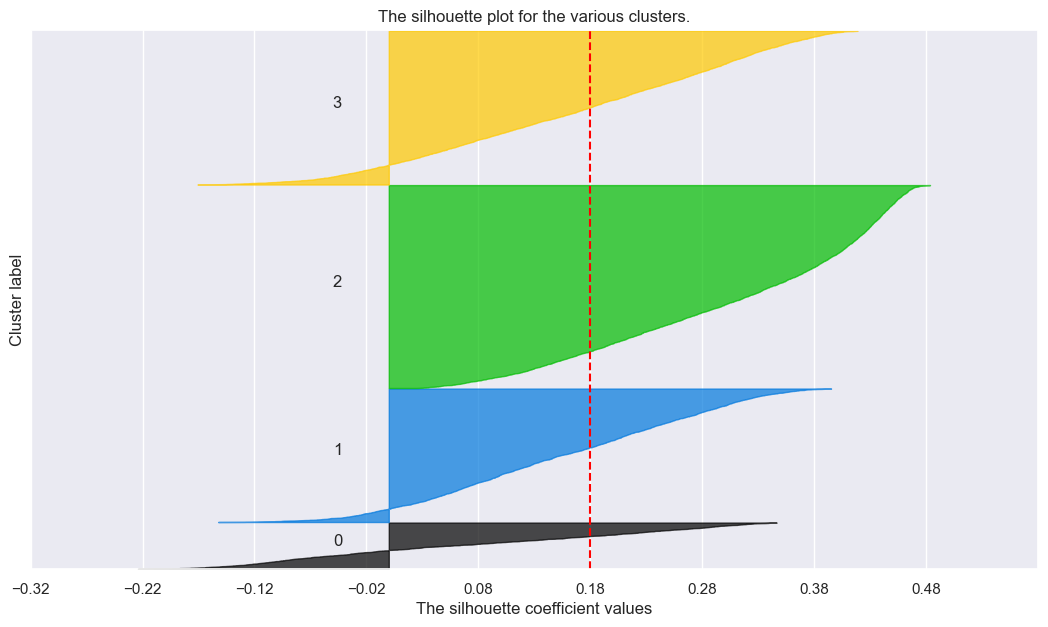

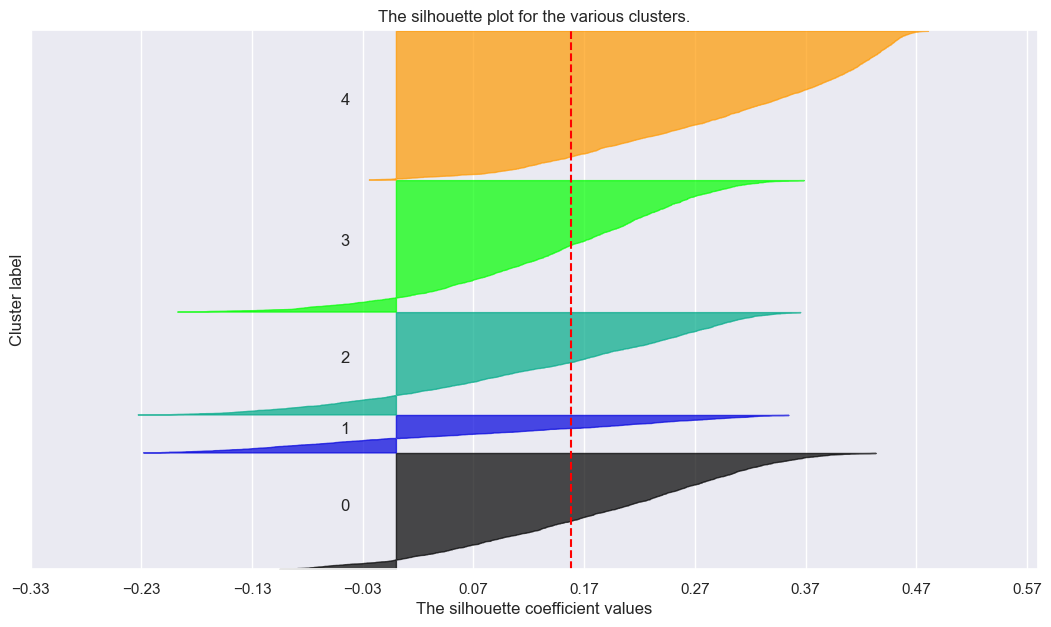

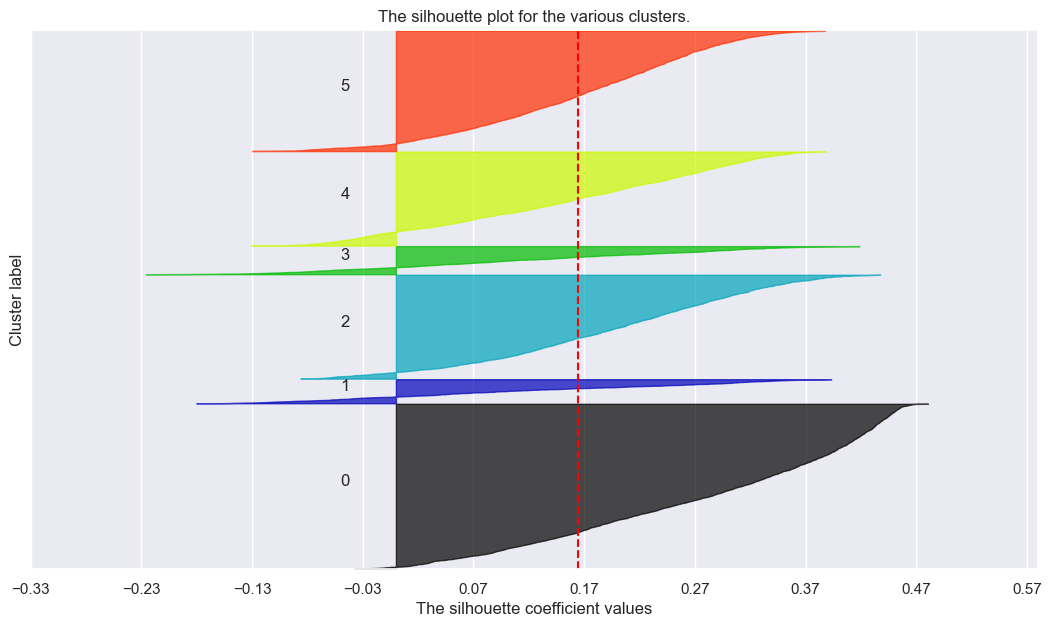

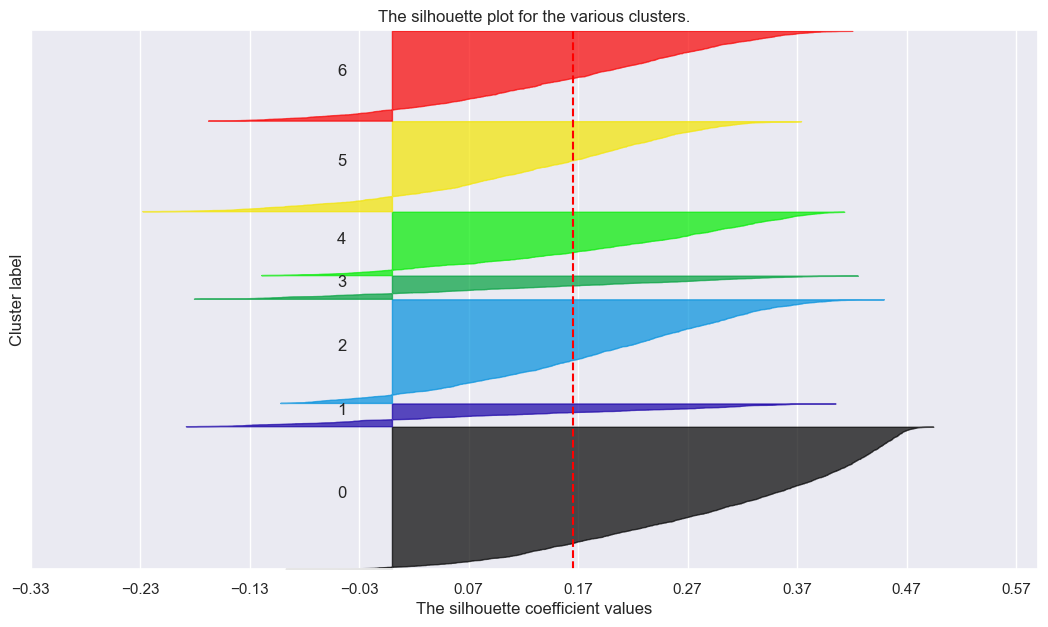

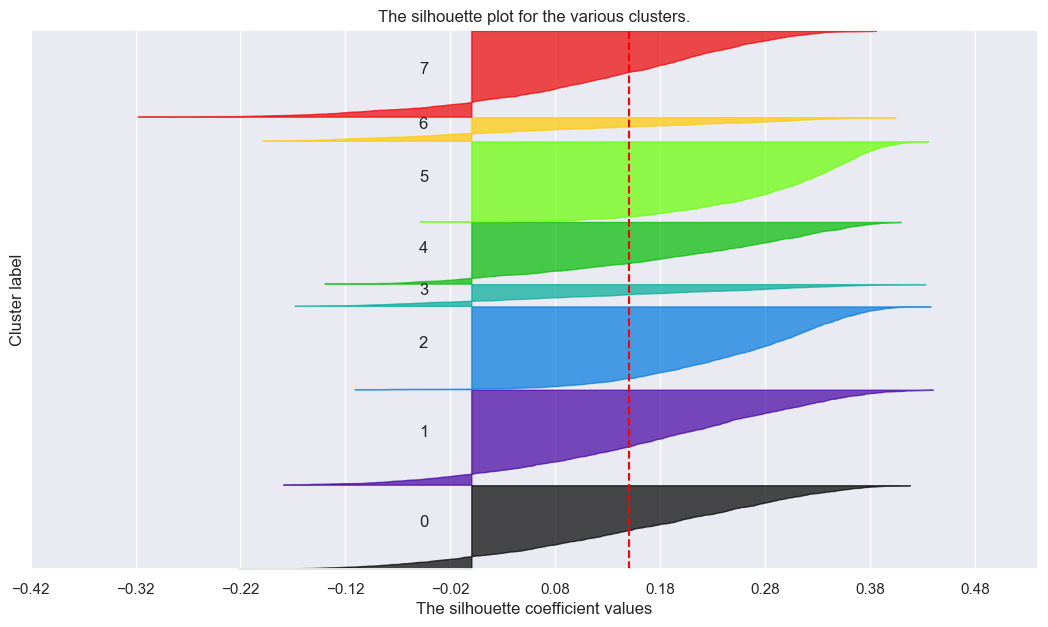

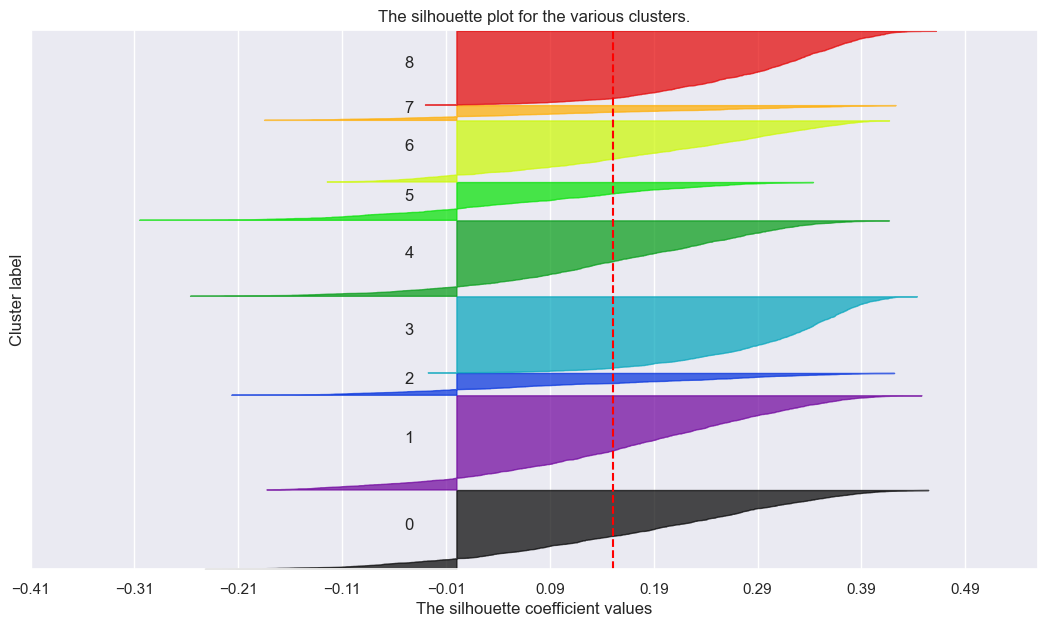

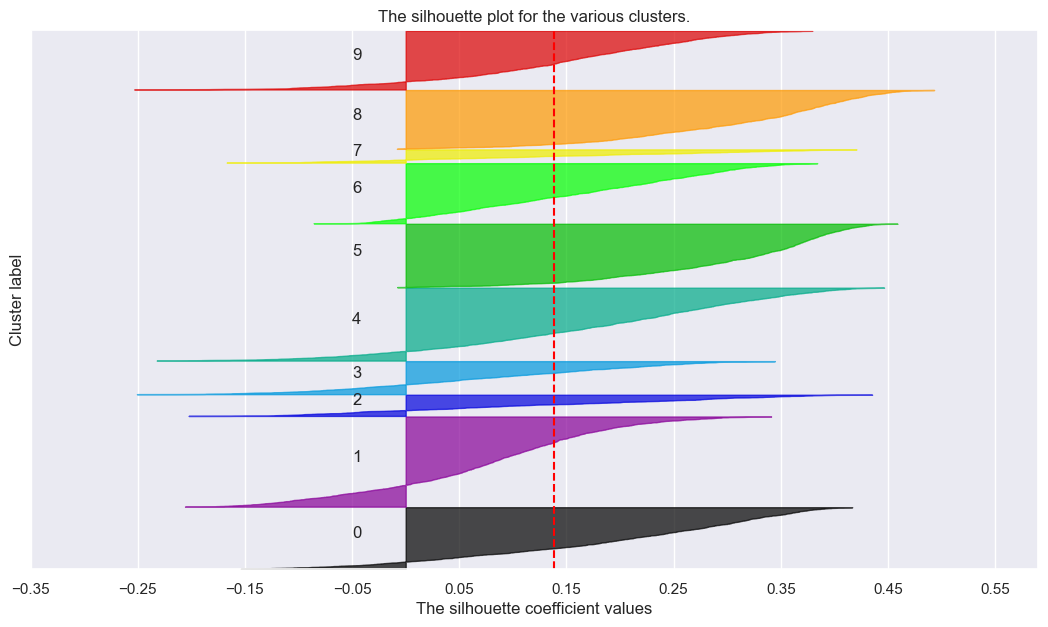

In [136]:
range_clusters = range(1, 11)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kproto = KPrototypes(n_clusters=nclus, init='Cao',verbose=2, random_state=1)
    cluster_labels = kproto.fit_predict(df,categorical=[8,9,10,11,12])
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

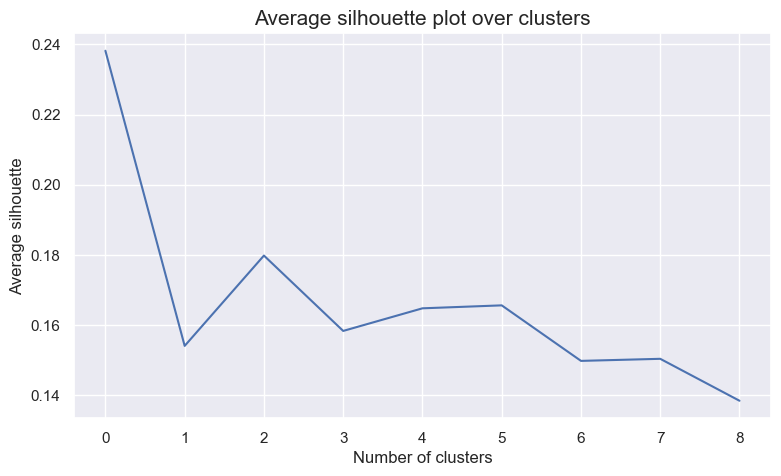

In [166]:
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [139]:
df.shape

(10222, 13)

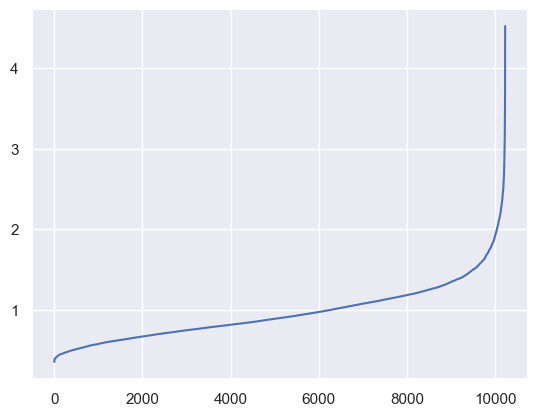

In [150]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df)
distances,_ = neigh.kneighbors(df)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

# MinPts: As a rule of thumb, minPts = 2 x dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.
minPts = 13*2

In [8]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.7, min_samples=14,n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [9]:
Counter(dbscan_labels)

Counter({0: 10104, -1: 118})

In [10]:
#With this method we are not going to achieve very good clustering results for this spcecific dataset
#but we can use it to outlier detection

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1544, ncost: 27587.23801095548
Run: 1, iteration: 2/100, moves: 502, ncost: 27451.925700875472
Run: 1, iteration: 3/100, moves: 320, ncost: 27387.417182602054
Run: 1, iteration: 4/100, moves: 208, ncost: 27361.910454349905
Run: 1, iteration: 5/100, moves: 129, ncost: 27351.630977362907
Run: 1, iteration: 6/100, moves: 62, ncost: 27349.670293085168
Run: 1, iteration: 7/100, moves: 24, ncost: 27349.318883803284
Run: 1, iteration: 8/100, moves: 16, ncost: 27349.152764683557
Run: 1, iteration: 9/100, moves: 10, ncost: 27349.075058681337
Run: 1, iteration: 10/100, moves: 7, ncost: 27349.05036558345
Run: 1, iteration: 11/100, moves: 1, ncost: 27349.049638017947
Run: 1, iteration: 12/100, moves: 5, ncost: 27349.021595087514
Run: 1, iteration: 13/100, moves: 7, ncost: 27348.98937296952
Run: 1, iteration: 14/

Run: 9, iteration: 4/100, moves: 134, ncost: 27352.791926930848
Run: 9, iteration: 5/100, moves: 71, ncost: 27350.246709470437
Run: 9, iteration: 6/100, moves: 35, ncost: 27349.62152756771
Run: 9, iteration: 7/100, moves: 27, ncost: 27349.205707074732
Run: 9, iteration: 8/100, moves: 18, ncost: 27349.048049029192
Run: 9, iteration: 9/100, moves: 8, ncost: 27349.013383005433
Run: 9, iteration: 10/100, moves: 2, ncost: 27349.009008661582
Run: 9, iteration: 11/100, moves: 3, ncost: 27349.00123794367
Run: 9, iteration: 12/100, moves: 4, ncost: 27348.987207787046
Run: 9, iteration: 13/100, moves: 0, ncost: 27348.987207787046
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 2188, ncost: 28593.49261591863
Run: 10, iteration: 2/100, moves: 1347, ncost: 27468.423569287683
Run: 10, iteration: 3/100, moves: 396, ncost: 27374.042627839368
Run: 10, iteration: 4/100, moves: 169, ncost: 27355.272001899077
Run: 10, iteration: 5/100, move

Run: 5, iteration: 3/100, moves: 515, ncost: 22869.540452740286
Run: 5, iteration: 4/100, moves: 366, ncost: 22797.163935438733
Run: 5, iteration: 5/100, moves: 259, ncost: 22763.695481903054
Run: 5, iteration: 6/100, moves: 147, ncost: 22753.720317355615
Run: 5, iteration: 7/100, moves: 93, ncost: 22750.065719250542
Run: 5, iteration: 8/100, moves: 43, ncost: 22749.16678403735
Run: 5, iteration: 9/100, moves: 25, ncost: 22748.675668273845
Run: 5, iteration: 10/100, moves: 15, ncost: 22748.455189717286
Run: 5, iteration: 11/100, moves: 13, ncost: 22748.35349868246
Run: 5, iteration: 12/100, moves: 5, ncost: 22748.316550522522
Run: 5, iteration: 13/100, moves: 0, ncost: 22748.316550522522
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 2957, ncost: 24333.41319592601
Run: 6, iteration: 2/100, moves: 788, ncost: 24050.33628922833
Run: 6, iteration: 3/100, moves: 663, ncost: 23712.31106590255
Run: 6, iteration: 4/100, moves: 

Run: 1, iteration: 13/100, moves: 63, ncost: 21246.870228130912
Run: 1, iteration: 14/100, moves: 25, ncost: 21246.558320072632
Run: 1, iteration: 15/100, moves: 18, ncost: 21246.331265834226
Run: 1, iteration: 16/100, moves: 5, ncost: 21246.28573955189
Run: 1, iteration: 17/100, moves: 7, ncost: 21246.256299025634
Run: 1, iteration: 18/100, moves: 0, ncost: 21246.256299025634
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3702, ncost: 21962.486417330074
Run: 2, iteration: 2/100, moves: 1519, ncost: 21190.218412108614
Run: 2, iteration: 3/100, moves: 1548, ncost: 20273.272512935055
Run: 2, iteration: 4/100, moves: 1297, ncost: 19692.436976894853
Run: 2, iteration: 5/100, moves: 720, ncost: 19547.442585605957
Run: 2, iteration: 6/100, moves: 345, ncost: 19516.008044147013
Run: 2, iteration: 7/100, moves: 155, ncost: 19510.16071141518
Run: 2, iteration: 8/100, moves: 62, ncost: 19509.0537017577
Run: 2, iteration: 9/100, mo

Run: 10, iteration: 7/100, moves: 64, ncost: 19422.9996844842
Run: 10, iteration: 8/100, moves: 58, ncost: 19421.21244160968
Run: 10, iteration: 9/100, moves: 28, ncost: 19420.54654061577
Run: 10, iteration: 10/100, moves: 27, ncost: 19420.225377986335
Run: 10, iteration: 11/100, moves: 12, ncost: 19420.124047290716
Run: 10, iteration: 12/100, moves: 4, ncost: 19420.0979802579
Run: 10, iteration: 13/100, moves: 0, ncost: 19420.0979802579
Best run was number 5
For n_clusters = 4, the average silhouette_score is : 0.22381373358025272


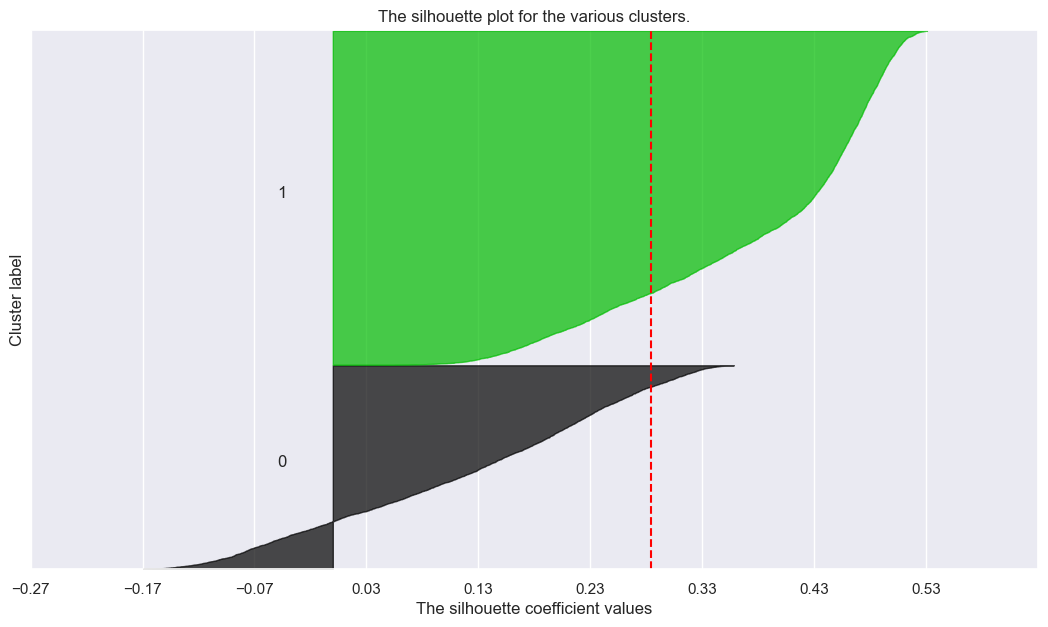

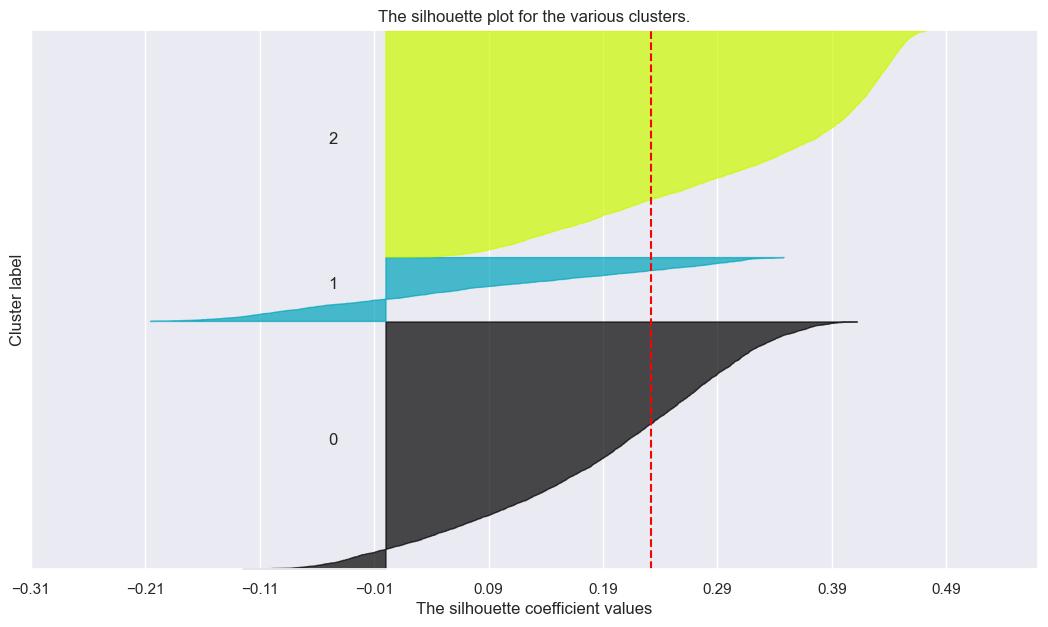

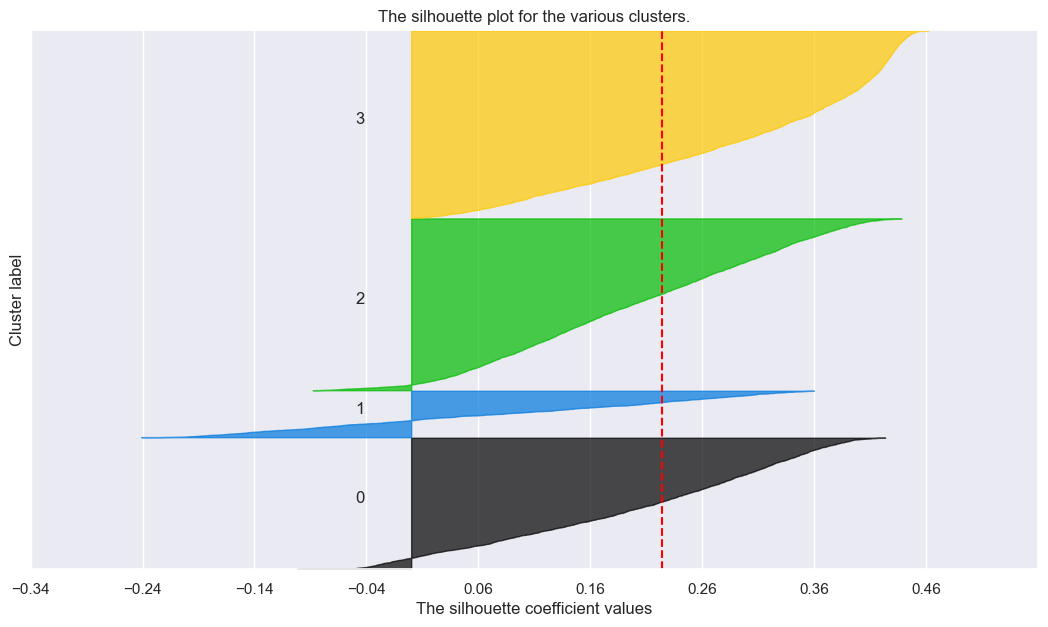

In [181]:
range_clusters = range(1, 5)
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kproto = KPrototypes(n_clusters=nclus, init='Cao',verbose=2, random_state=1)
    cluster_labels = kproto.fit_predict(dfInsurance,categorical=[5])
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(dfInsurance, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfInsurance, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(dfInsurance) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

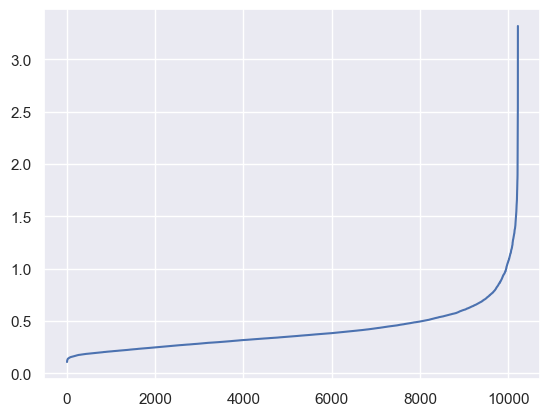

In [185]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(dfInsurance)
distances,_ = neigh.kneighbors(dfInsurance)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()


In [11]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.77, min_samples=14,n_jobs=-1)
dbscan_labels = dbscan.fit_predict(dfInsurance)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 3


In [12]:
Counter(dbscan_labels)

Counter({0: 7617, -1: 614, 1: 1991})

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2794, ncost: 6489.65980557965
Run: 1, iteration: 2/100, moves: 171, ncost: 6487.0333660944325
Run: 1, iteration: 3/100, moves: 49, ncost: 6486.533997894754
Run: 1, iteration: 4/100, moves: 20, ncost: 6486.462572491545
Run: 1, iteration: 5/100, moves: 5, ncost: 6486.454173142345
Run: 1, iteration: 6/100, moves: 4, ncost: 6486.451017196836
Run: 1, iteration: 7/100, moves: 0, ncost: 6486.451017196836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1435, ncost: 6526.22206365021
Run: 2, iteration: 2/100, moves: 454, ncost: 6491.199489834492
Run: 2, iteration: 3/100, moves: 139, ncost: 6487.358558873557
Run: 2, iteration: 4/100, moves: 56, ncost: 6486.618943372264
Run: 2, iteration: 5/100, moves: 26, ncost: 6486.4797184159015
Run: 2, iteratio

Run: 3, iteration: 6/100, moves: 32, ncost: 5087.7091612706945
Run: 3, iteration: 7/100, moves: 11, ncost: 5087.690514870352
Run: 3, iteration: 8/100, moves: 10, ncost: 5087.672789734083
Run: 3, iteration: 9/100, moves: 10, ncost: 5087.6605004150215
Run: 3, iteration: 10/100, moves: 1, ncost: 5087.660300637892
Run: 3, iteration: 11/100, moves: 0, ncost: 5087.660300637892
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 2566, ncost: 5344.614083261591
Run: 4, iteration: 2/100, moves: 1360, ncost: 5151.569935857615
Run: 4, iteration: 3/100, moves: 688, ncost: 5102.14842643865
Run: 4, iteration: 4/100, moves: 301, ncost: 5091.85192008523
Run: 4, iteration: 5/100, moves: 162, ncost: 5088.682418267929
Run: 4, iteration: 6/100, moves: 76, ncost: 5088.003474875057
Run: 4, iteration: 7/100, moves: 49, ncost: 5087.7535159960435
Run: 4, iteration: 8/100, moves: 25, ncost: 5087.698382019192
Run: 4, iteration: 9/100, moves: 14, ncost: 

Run: 4, iteration: 4/100, moves: 432, ncost: 3907.220485237014
Run: 4, iteration: 5/100, moves: 136, ncost: 3905.009024210594
Run: 4, iteration: 6/100, moves: 68, ncost: 3904.467321903645
Run: 4, iteration: 7/100, moves: 34, ncost: 3904.3389591433847
Run: 4, iteration: 8/100, moves: 16, ncost: 3904.3185163835624
Run: 4, iteration: 9/100, moves: 2, ncost: 3904.317295098868
Run: 4, iteration: 10/100, moves: 6, ncost: 3904.3128139600185
Run: 4, iteration: 11/100, moves: 2, ncost: 3904.312156866656
Run: 4, iteration: 12/100, moves: 2, ncost: 3904.3108953327264
Run: 4, iteration: 13/100, moves: 1, ncost: 3904.3106610930254
Run: 4, iteration: 14/100, moves: 0, ncost: 3904.3106610930254
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 2686, ncost: 4064.6065186707783
Run: 5, iteration: 2/100, moves: 1362, ncost: 3925.1955103637715
Run: 5, iteration: 3/100, moves: 436, ncost: 3907.950758812508
Run: 5, iteration: 4/100, moves: 163, 

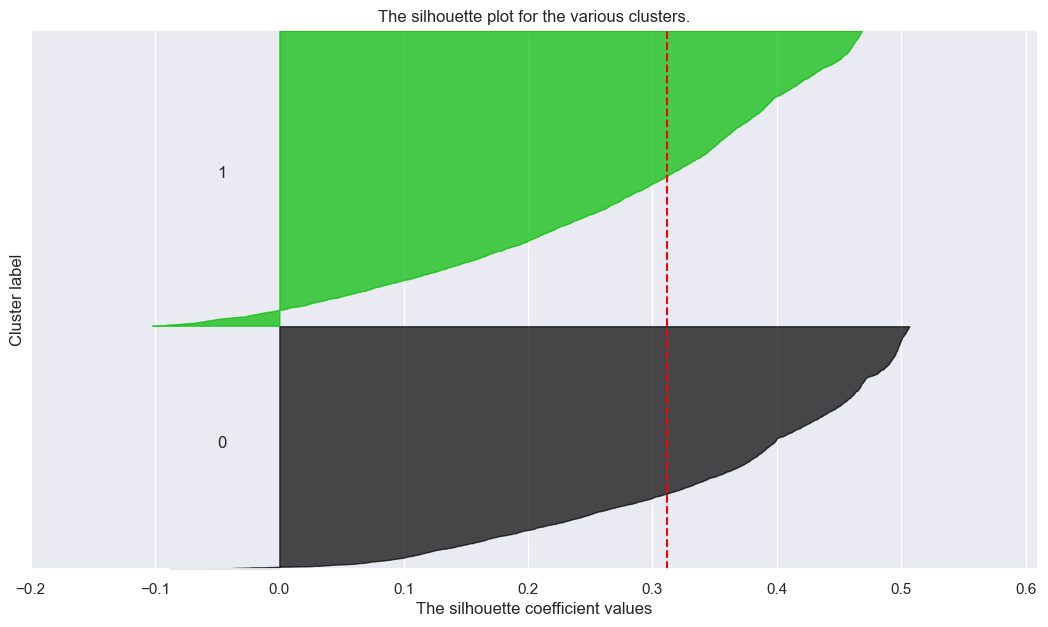

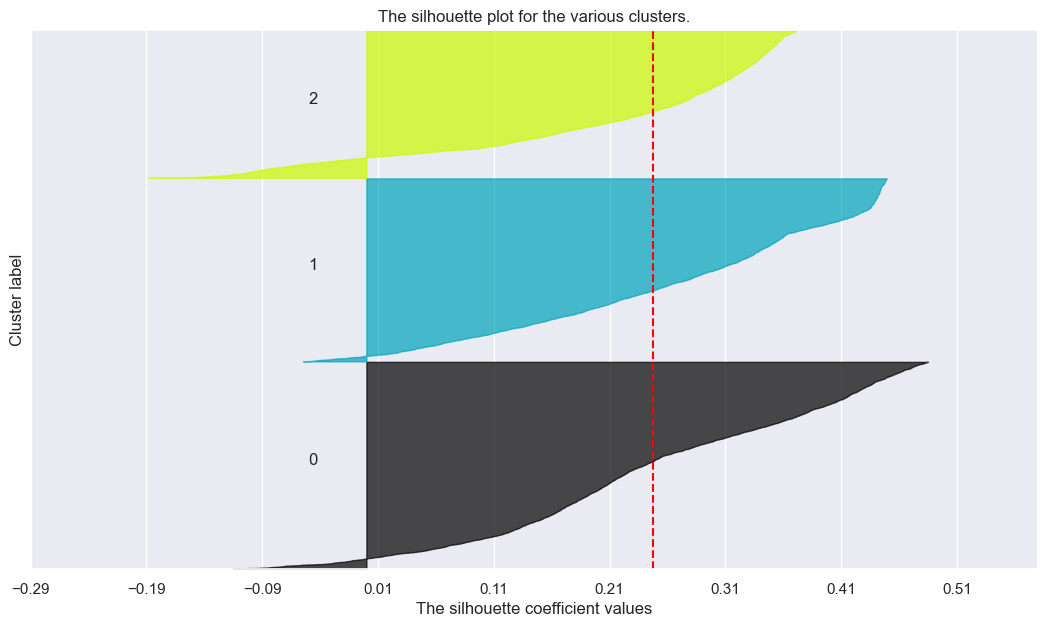

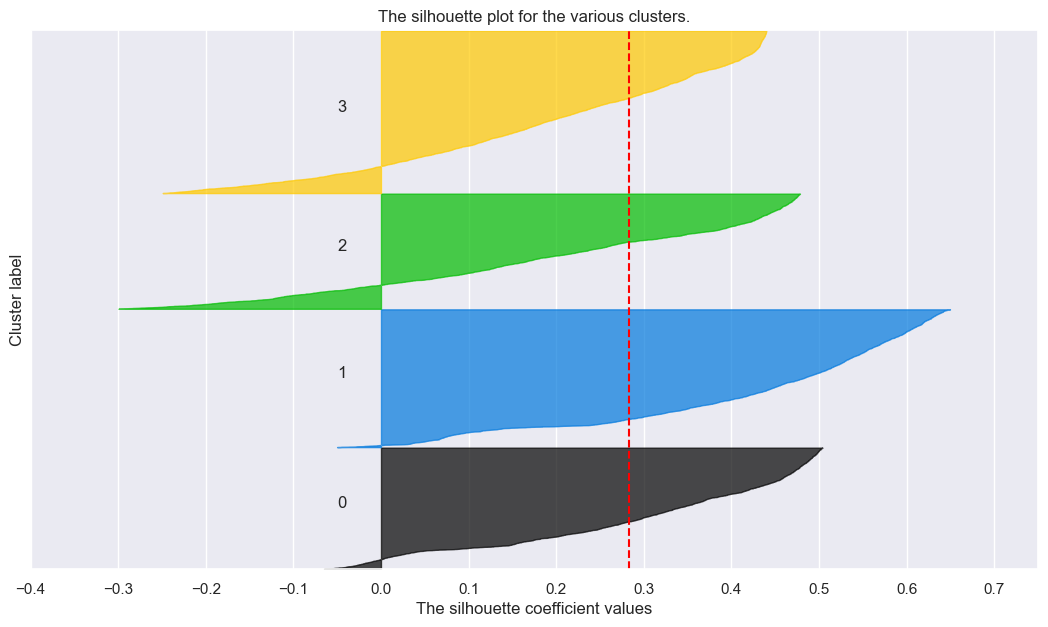

In [201]:
range_clusters = range(1, 5)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KPrototypes object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kproto = KPrototypes(n_clusters=nclus, init='Cao',verbose=2, random_state=1)
    cluster_labels = kproto.fit_predict(dfDemographic,categorical=[1,2,3,4])
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(dfDemographic, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfDemographic, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(dfDemographic) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3161, ncost: 4699.093212059224
Run: 1, iteration: 2/100, moves: 2763, ncost: 3953.195629564178
Run: 1, iteration: 3/100, moves: 1357, ncost: 3912.485039104879
Run: 1, iteration: 4/100, moves: 259, ncost: 3906.4102885398606
Run: 1, iteration: 5/100, moves: 101, ncost: 3905.001121926946
Run: 1, iteration: 6/100, moves: 63, ncost: 3904.470665238728
Run: 1, iteration: 7/100, moves: 31, ncost: 3904.320407110073
Run: 1, iteration: 8/100, moves: 8, ncost: 3904.313358821848
Run: 1, iteration: 9/100, moves: 3, ncost: 3904.3120753371827
Run: 1, iteration: 10/100, moves: 1, ncost: 3904.3118424516533
Run: 1, iteration: 11/100, moves: 0, ncost: 3904.3118424516533
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3068, ncost: 4579.565523992381
Run: 2, 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4069, ncost: 3783.812862733799
Run: 1, iteration: 2/100, moves: 2711, ncost: 3325.88127851925
Run: 1, iteration: 3/100, moves: 380, ncost: 3318.497338285602
Run: 1, iteration: 4/100, moves: 117, ncost: 3317.3926696702074
Run: 1, iteration: 5/100, moves: 45, ncost: 3317.210027633546
Run: 1, iteration: 6/100, moves: 22, ncost: 3317.147848658429
Run: 1, iteration: 7/100, moves: 21, ncost: 3317.101661943188
Run: 1, iteration: 8/100, moves: 10, ncost: 3317.0875974053724
Run: 1, iteration: 9/100, moves: 4, ncost: 3317.0860081015126
Run: 1, iteration: 10/100, moves: 0, ncost: 3317.0860081015126
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2595, ncost: 3464.959358620569
Run: 2, iteration: 2/100, moves: 366, ncost: 3454.3820097005405
Run: 2, 

For n_clusters = 5, the average silhouette_score is : 0.29955419502420405
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3310, ncost: 3201.75585556072
Run: 1, iteration: 2/100, moves: 1409, ncost: 3105.048277773142
Run: 1, iteration: 3/100, moves: 215, ncost: 3102.270760675693
Run: 1, iteration: 4/100, moves: 53, ncost: 3101.8740504179605
Run: 1, iteration: 5/100, moves: 25, ncost: 3101.7888550999614
Run: 1, iteration: 6/100, moves: 15, ncost: 3101.760931580335
Run: 1, iteration: 7/100, moves: 15, ncost: 3101.7445179895853
Run: 1, iteration: 8/100, moves: 2, ncost: 3101.743179796932
Run: 1, iteration: 9/100, moves: 1, ncost: 3101.7428117870263
Run: 1, iteration: 10/100, moves: 0, ncost: 3101.7428117870263
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2731, ncost: 3300.292532971748

Run: 8, iteration: 8/100, moves: 37, ncost: 3073.3808006258228
Run: 8, iteration: 9/100, moves: 18, ncost: 3073.354918709884
Run: 8, iteration: 10/100, moves: 13, ncost: 3073.3375630916794
Run: 8, iteration: 11/100, moves: 4, ncost: 3073.335377382146
Run: 8, iteration: 12/100, moves: 0, ncost: 3073.335377382146
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 3160, ncost: 3249.104008825994
Run: 9, iteration: 2/100, moves: 1039, ncost: 3116.3221530440987
Run: 9, iteration: 3/100, moves: 394, ncost: 3099.080812050127
Run: 9, iteration: 4/100, moves: 155, ncost: 3096.4801818279784
Run: 9, iteration: 5/100, moves: 59, ncost: 3095.884933925842
Run: 9, iteration: 6/100, moves: 18, ncost: 3095.8402015011247
Run: 9, iteration: 7/100, moves: 3, ncost: 3095.839102511638
Run: 9, iteration: 8/100, moves: 0, ncost: 3095.839102511638
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing

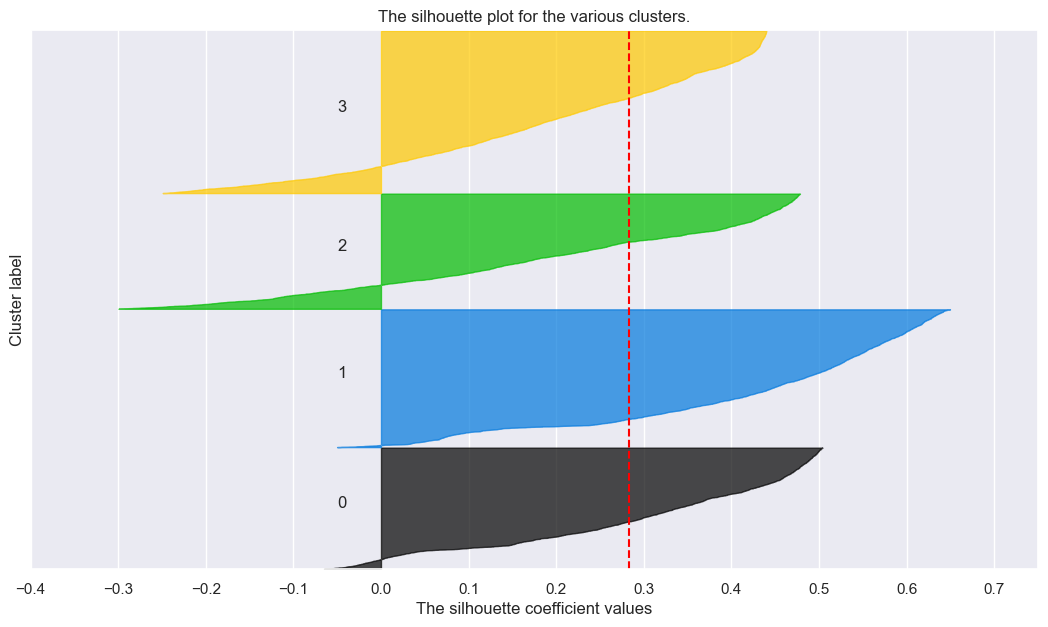

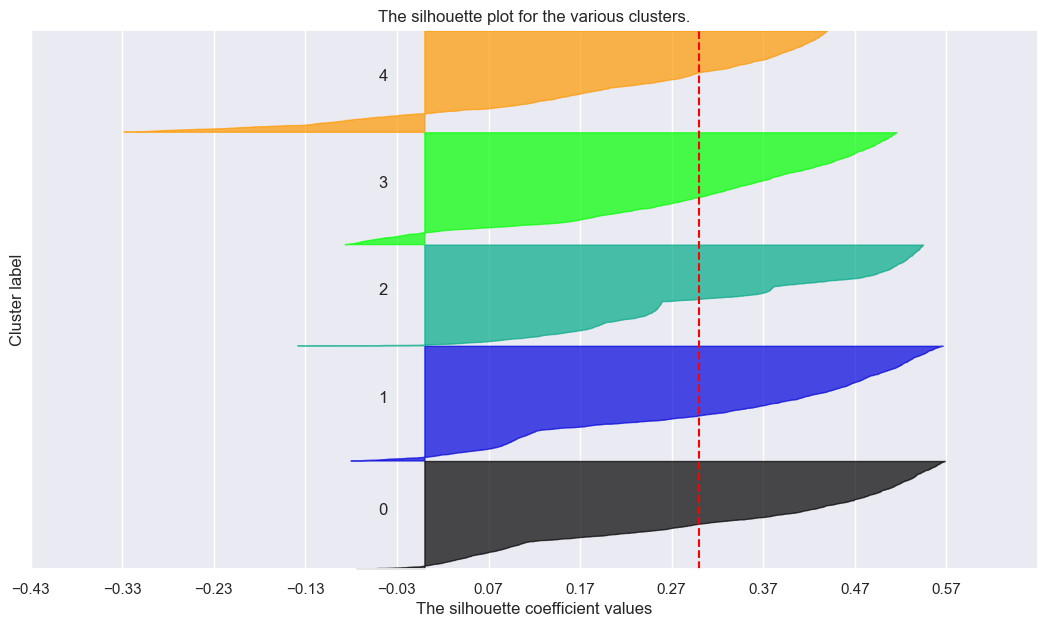

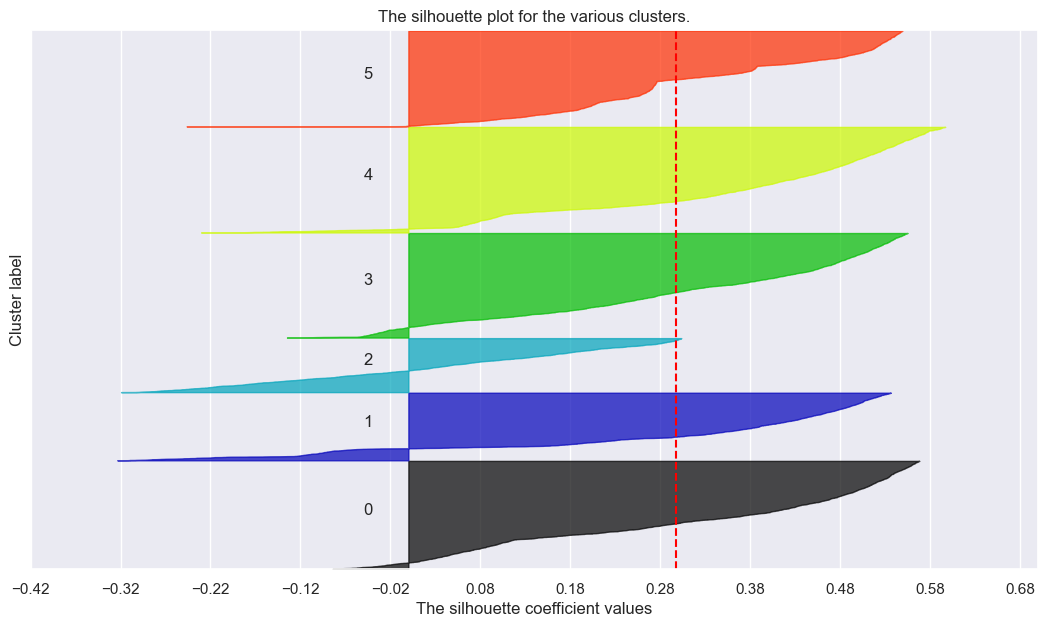

In [203]:
range_clusters = range(4, 7)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kproto = KPrototypes(n_clusters=nclus, init='Cao',verbose=2, random_state=1)
    cluster_labels = kproto.fit_predict(dfDemographic,categorical=[1,2,3,4])
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(dfDemographic, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfDemographic, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(dfDemographic) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

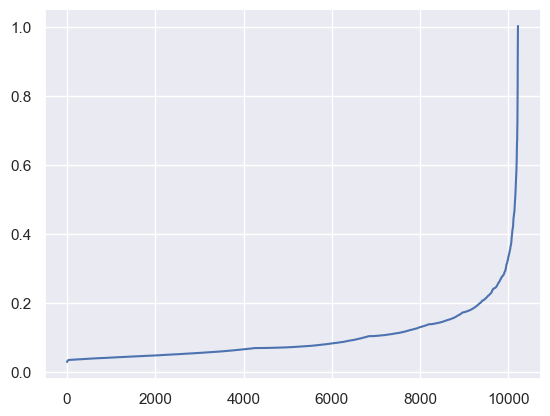

In [204]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(dfDemographic)
distances,_ = neigh.kneighbors(dfDemographic)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()


In [13]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.25, min_samples=12,n_jobs=-1)
dbscan_labels = dbscan.fit_predict(dfDemographic)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 11


In [15]:
Counter(dbscan_labels)

Counter({0: 2466,
         9: 12,
         1: 3397,
         2: 1013,
         3: 1394,
         4: 864,
         5: 481,
         6: 169,
         7: 201,
         -1: 95,
         8: 130})